# Лабораторная работа №6. Многоскоростная обработка сигналов.
Курс: лаборатория цифровой обработки сигналов, ФРКТ МФТИ

#  Модуль 2. Прореживание и передискретизация сигналов с рациональным коэффициентом.

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
def dtft(x, M=2048):
    """
    Функция вычисляет значения ДВПФ в M точках на отрезке 
    по оси нормированных частот [-0.5; 0.5]

    Parameters
    ----------
    x : complex
        входная последовательность отсчетов, первый отсчет при k=0
    M : int
        колличество точек на отрезке [-0.5; 0.5]

    Returns
    -------
    float
        значения оси нормированных частот, 
        соотвествующих вычисленным значениям
        спектральной функции  
    complex
        значения спектральной функции      
    """
    return (np.fft.fftshift(np.fft.fftfreq(M, d=1)), np.fft.fftshift(np.fft.fft(x, M)))

In [2]:
%matplotlib notebook

In [3]:
%matplotlib inline

## Эффект наложения (повторение)

Поскольку при прореживании сигнала с коэфициентом $M$ его частота дискретизации уменьшается:
$$\widetilde{f}_\text{д}={f}_\text{д} / M,$$
то может возникнуть эффект наложения. По этой причине в системах децимации необходимо использовать фильтр.


Если спектр исходного аналогового сигнала $X(f)$ отличен от нуля только на частотах $f\in(-f_\text{д}/2;\; f_\text{д}/2)$, то при его дискретизации с частотой $f_\text{д}$ он периодически повторяется без наложения отдельных копий друг на друга. Обратное не всегда верно, например
* при субдискретизации (эффект наложения есть, но отдельные копии не перекрываются); 
* при $X(f)$ отличном от нуля лишь на частотах $f\in[-f_\text{д}/2;\; f_\text{д}/2]$ и $X(f_\text{д}/2)=X(-f_\text{д}/2)$.

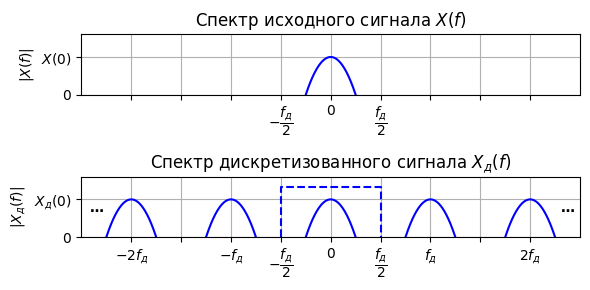

In [4]:
#@title > Figure | Cпектры сигналов
x=-1+np.arange(2000)/1000
y=0.75*(1-(x*x))

plt.figure(figsize=[6, 3], dpi=100)
plt.subplot(2,1,1)
plt.plot(x,y,'b-')
plt.axis(ymin=0, xmin=-10, xmax=10, ymax=1.2)
plt.xticks([-8, -6, -4, -2, 0, 2, 4, 6, 8], 
           ('', '', '', '$- \\dfrac{f_д}{2}$', 0, '$\\dfrac{f_д}{2}$', '', '', ''))
plt.grid()
plt.title('Спектр исходного сигнала $X(f)$')
plt.ylabel('$|X(f)|$')
plt.yticks([0, 0.75], labels=("$0$", "$X(0)$"))
    
plt.subplot(2,1,2)
plt.plot(x,y,'b-')
plt.plot((-2,-2, 2, 2),(0,1, 1, 0), 'b--') 
plt.plot(x-4,y,'b-')
plt.plot(x+4,y,'b-')
plt.plot(x-8,y,'b-')
plt.plot(x+8,y,'b-')
plt.axis(ymin=0, xmin=-10, xmax=10, ymax=1.2)
plt.xticks([-8, -6, -4, -2, 0, 2, 4, 6, 8], 
           ('$-2f_д$', '', '$-f_д$', '$- \\dfrac{f_д}{2}$', 0, 
            '$\\dfrac{f_д}{2}$', '$f_д$', '', '$2f_д$'))
plt.annotate(u"$\mathbf{\dots}$", (9.2, 0.5))
plt.annotate(u"$\mathbf{\dots}$", (-9.7, 0.5))
plt.title('Спектр дискретизованного сигнала $X_д(f)$')
plt.ylabel('$|X_д(f)|$')
plt.grid()
plt.yticks([0, 0.75], labels=("$0$", "$X_д(0)$"))
plt.tight_layout()

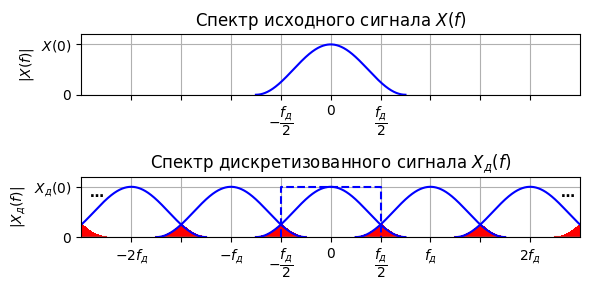

In [5]:
#@title > Figure | Эффект наложения
x=-3+np.arange(6000)/1000
0.5*np.pi#y=0.75*(1-(x*x))
y=np.cos(0.5*np.pi*x/3)**2

plt.figure(figsize=[6, 3], dpi=100)
plt.subplot(2,1,1)
plt.plot(x,y,'b-')
plt.axis(ymin=0, xmin=-10, xmax=10, ymax=1.2)
plt.xticks([-8, -6, -4, -2, 0, 2, 4, 6, 8], 
           ('', '', '', '$- \\dfrac{f_д}{2}$', 0, '$\\dfrac{f_д}{2}$', '', '', ''))
plt.grid()
plt.title('Спектр исходного сигнала $X(f)$')
plt.ylabel('$|X(f)|$')
plt.yticks([0, 1], labels=("$0$", "$X(0)$"))
plt.subplot(2,1,2)

x_f=np.linspace(1,2,100)
x_f2=np.linspace(2,3,100)

fill_f=lambda x_f: np.cos(0.5*np.pi*(x_f-4)/3)**2
for step in [-8, -4, 0, 4, 8]:
    plt.stem(x_f-step, fill_f(x_f), 'r', markerfmt='r,', 
         use_line_collection=True)
    plt.stem(x_f2-step-4, fill_f(x_f2+4), 'r', markerfmt='r,', 
         use_line_collection=True)

plt.plot(x,y,'b-')
plt.plot((-2,-2, 2, 2),(0,1, 1, 0), 'b--') 
plt.plot(x-4,y,'b-')
plt.plot(x+4,y,'b-')
plt.plot(x-8,y,'b-')
plt.plot(x+8,y,'b-')
plt.axis(ymin=0, xmin=-10, xmax=10, ymax=1.2)
plt.xticks([-8, -6, -4, -2, 0, 2, 4, 6, 8], 
           ('$-2f_д$', '', '$-f_д$', '$- \\dfrac{f_д}{2}$', 0, 
            '$\\dfrac{f_д}{2}$', '$f_д$', '', '$2f_д$'))
plt.annotate(u"$\mathbf{\dots}$", (9.2, 0.8))
plt.annotate(u"$\mathbf{\dots}$", (-9.7, 0.8))
plt.title('Спектр дискретизованного сигнала $X_д(f)$')
plt.ylabel('$|X_д(f)|$')
plt.yticks([0, 1], labels=("$0$", "$X_д(0)$"))
plt.grid()




plt.tight_layout()
plt.show()

## Прореживание сигнала без наложения спектров

**Пример**. Пусть аналоговый сигнал $0,4\cos(2\pi t f_0)$, $f_0=0,46$ Гц дискретизован с частотой дискретизации $f_д=20$ Гц.

На рисунке ниже выведен фрагмент сигнала для $t\in(0; T)$, $T=3$ с и его отсчеты. 

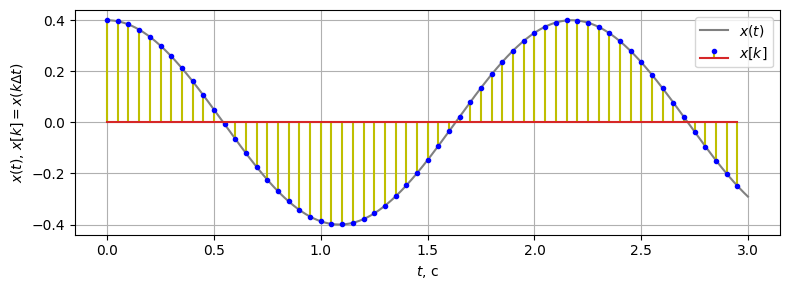

In [6]:
T, f0, fs = 3, 0.46, 20
t = np.arange(0, T, 0.001)
x_analog = 0.4 * np.cos(2*np.pi*t*f0)
t_k = np.arange(0, T, 1/fs)
x = 0.4*np.cos(2*np.pi*t_k*f0)

plt.figure(figsize=[8, 3], dpi=100)
plt.plot(t, x_analog, 'grey', label="$x(t)$")
plt.stem(t_k, x, 'y', markerfmt='b.', use_line_collection=True, label="$x[k]$")
plt.xlabel("$t$, с")
plt.ylabel('$x(t)$, $x[k]=x(k\Delta t)$')
plt.tight_layout()
plt.legend()
plt.grid()

Расмотрим прореживание сигнала $x[k]$ с коэффициентом $M=4$ без фильтрации.

In [7]:
M=4
x2=signal.upfirdn([1], x, up=1, down=M)
t_k2=t_k[::M]

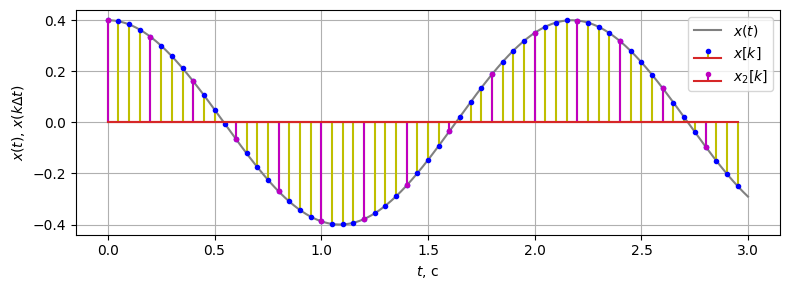

In [8]:
plt.figure(figsize=[8, 3], dpi=100)
plt.plot(t, x_analog, 'grey', label="$x(t)$")
plt.stem(t_k, x, 'y', markerfmt='b.', use_line_collection=True, label="$x[k]$")
plt.stem(t_k2, x2, 'm', markerfmt='m.', use_line_collection=True, label="$x_2[k]$")
plt.xlabel("$t$, с")
plt.ylabel('$x(t)$, $x(k\Delta t)$')
plt.tight_layout()
plt.legend()
plt.grid()

При прореживании сигнала с коэфициентом $M=4$ его частота дискретизации уменьшается в 4 раза:
$$\widetilde{f}_\text{д}={f}_\text{д} / M={f}_\text{д} / 4=5 \text{ Гц},$$

$$\Delta \widetilde{t} _\text{д} = M \Delta t= 4 \Delta t.$$

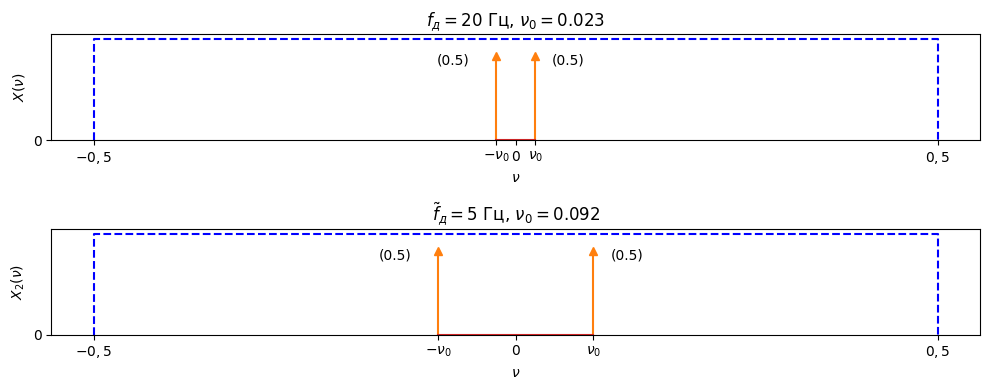

In [9]:
plt.figure(figsize=[10, 4], dpi=100)
nu0=f0/fs

plt.subplot(2,1,1)
plt.title("$f_д=20$ Гц, $\\nu_0=$%.3f" %nu0)
plt.stem([-nu0, nu0], [0.5, 0.5], 'C1', markerfmt="C1^", use_line_collection=True)
plt.plot((-0.5,-0.5, 0.5, 0.5),(0,0.6, 0.6, 0), 'b--') 
plt.annotate(u"(0.5)", (-nu0-0.07, 0.45))
plt.annotate(u"(0.5)", (nu0+0.02, 0.45))
plt.xlabel('$\\nu$')
plt.ylabel('$X(\\nu)$')
plt.yticks([0])
plt.xticks([-0.5, -nu0, 0, nu0, 0.5], labels=("$-0,5$", "$-\\nu_0$", "$0$", "$\\nu_0$", "$0,5$"))
plt.ylim(bottom=0)

nu0=f0/(fs/M)
plt.subplot(2,1,2)
plt.title("$\\tilde{f}_д=5$ Гц, $\\nu_0=$%.3f" %nu0)
plt.stem([-nu0, nu0], [0.5, 0.5], 'C1', markerfmt="C1^", use_line_collection=True)
plt.plot((-0.5,-0.5, 0.5, 0.5),(0,0.6, 0.6, 0), 'b--') 
plt.annotate(u"(0.5)", (-nu0-0.07, 0.45))
plt.annotate(u"(0.5)", (nu0+0.02, 0.45))
plt.xlabel('$\\nu$')
plt.ylabel('$X_2(\\nu)$')
plt.yticks([0])
plt.xticks([-0.5, -nu0, 0, nu0, 0.5], labels=("$-0,5$", "$-\\nu_0$", "$0$", "$\\nu_0$", "$0,5$"))
plt.ylim(bottom=0)
plt.tight_layout()

## Прореживание сигнала и эффект наложения

Изменим предыдущий пример. Возмем $f_0=2,25$ Гц и $M=5$.

In [10]:
T=3
f0=2.25
t=np.arange(0, T, 0.001)
x_analog=0.4*np.cos(2*np.pi*t*f0)
x=x_analog[::50]
t_k=t[::50]

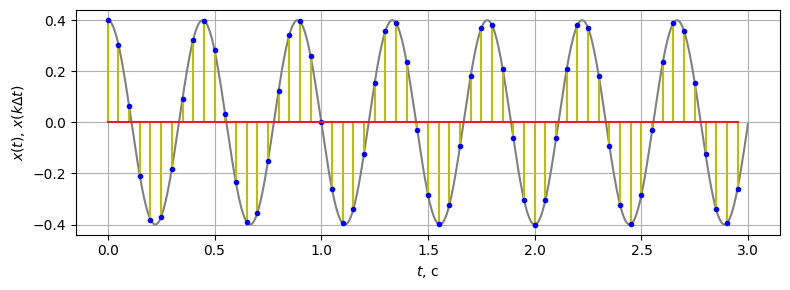

In [11]:
plt.figure(figsize=[8, 3], dpi=100)
plt.plot(t, x_analog, 'grey')
plt.stem(t_k, x, 'y', markerfmt='b.', use_line_collection=True)
plt.xlabel("$t$, с")
plt.ylabel('$x(t)$, $x(k\Delta t)$')
#plt.xticks(np.arange(x.size)[::4])
plt.tight_layout()
plt.grid()

In [12]:
M=5
x2=signal.upfirdn([1], x, up=1, down=M)
t_k2=t_k[::M]

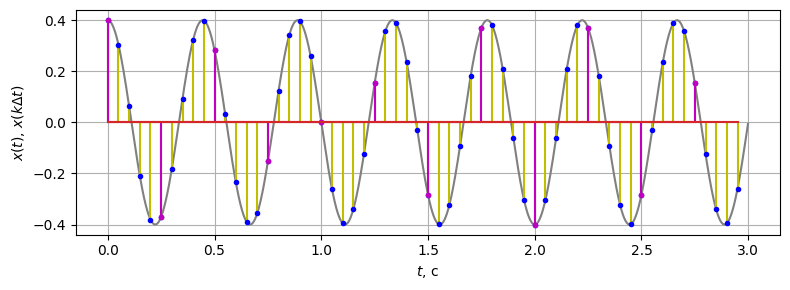

In [13]:
plt.figure(figsize=[8, 3], dpi=100)
plt.plot(t, x_analog, 'grey')
plt.stem(t_k, x, 'y', markerfmt='b.', use_line_collection=True)
plt.stem(t_k2, x2, 'm', markerfmt='m.', use_line_collection=True)
plt.xlabel("$t$, с")
plt.ylabel('$x(t)$, $x(k\Delta t)$')
plt.tight_layout()
plt.grid()

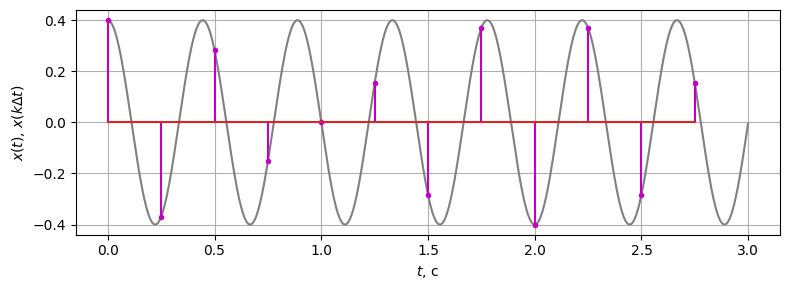

In [14]:
plt.figure(figsize=[8, 3], dpi=100)
plt.plot(t, x_analog, 'grey')
plt.stem(t_k2, x2, 'm', markerfmt='m.', use_line_collection=True)
plt.xlabel("$t$, с")
plt.ylabel('$x(t)$, $x(k\Delta t)$')
plt.tight_layout()
plt.grid()

In [15]:
fs2=1.0/(t_k2[1]-t_k2[0])
fs2

4.0

In [16]:
f2=f0-fs2
f2

-1.75

In [17]:
x_analog2=0.4*np.cos(2*np.pi*t*(f0-fs2))

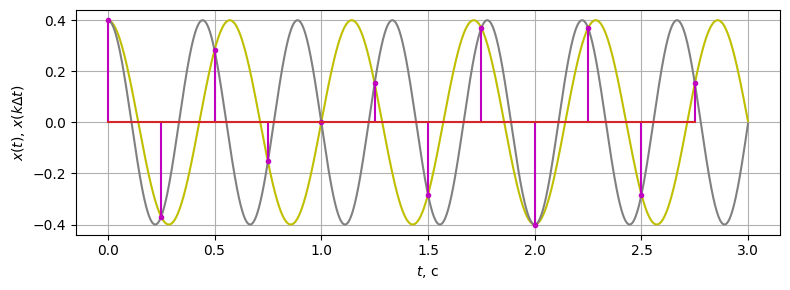

In [18]:
plt.figure(figsize=[8, 3], dpi=100)
plt.plot(t, x_analog2, 'y')
plt.plot(t, x_analog, 'grey')
plt.stem(t_k2, x2, 'm', markerfmt='m.')
plt.xlabel("$t$, с")
plt.ylabel('$x(t)$, $x(k\Delta t)$')
#plt.xticks(np.arange(x.size)[::4])
plt.tight_layout()
plt.grid()

Приведем интерпретацию эффекта наложения при прореживании в спектральной области.

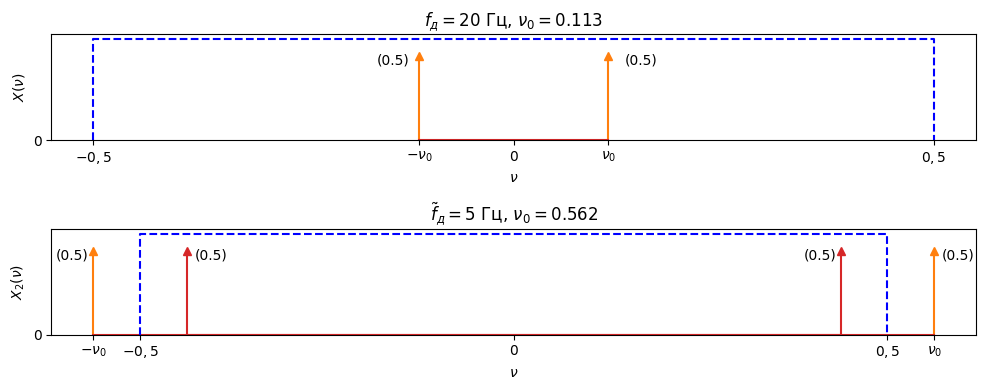

In [19]:
plt.figure(figsize=[10, 4], dpi=100)
nu0=f0/fs

plt.subplot(2,1,1)
plt.title("$f_д=20$ Гц, $\\nu_0=$%.3f" %nu0)
plt.stem([-nu0, nu0], [0.5, 0.5], 'C1', markerfmt="C1^", use_line_collection=True)
plt.plot((-0.5,-0.5, 0.5, 0.5),(0,0.6, 0.6, 0), 'b--') 
plt.annotate(u"(0.5)", (-nu0-0.05, 0.45))
plt.annotate(u"(0.5)", (nu0+0.02, 0.45))
plt.xlabel('$\\nu$')
plt.ylabel('$X(\\nu)$')
plt.yticks([0])
plt.xticks([-0.5, -nu0, 0, nu0, 0.5], labels=("$-0,5$", "$-\\nu_0$", "$0$", "$\\nu_0$", "$0,5$"))
plt.ylim(bottom=0)

nu0=f0/(fs/M)
plt.subplot(2,1,2)
plt.title("$\\tilde{f}_д=5$ Гц, $\\nu_0=$%.3f" %nu0)
plt.stem([-nu0, nu0], [0.5, 0.5], 'C1', markerfmt="C1^", use_line_collection=True)
plt.stem([1-nu0, -1+nu0], [0.5, 0.5], 'C3', markerfmt="C3^", use_line_collection=True)
plt.plot((-0.5,-0.5, 0.5, 0.5),(0,0.6, 0.6, 0), 'b--') 
plt.annotate(u"(0.5)", (-nu0-0.05, 0.45))
plt.annotate(u"(0.5)", (nu0+0.01, 0.45))
plt.annotate(u"(0.5)", (1-nu0-0.05, 0.45))
plt.annotate(u"(0.5)", (-1+nu0+0.01, 0.45))
plt.xlabel('$\\nu$')
plt.ylabel('$X_2(\\nu)$')
plt.yticks([0])
plt.xticks([-0.5, -nu0, 0, nu0, 0.5], labels=("$-0,5$", "$-\\nu_0$", "$0$", "$\\nu_0$", "$0,5$"))
plt.ylim(bottom=0)
plt.tight_layout()

## Эффект наложения при прореживании звуковых сигналов


Выполнить прореживание (downsampling) сигнала камертона (основная частота сигнала 440 Гц, частота дискретизации 44100 Гц) без предварительной фильтрации, оставляя в одном случае каждый $M_1=40$-ый, а в другом каждый $M_2=60$-ый отсчет сигнала. В чем принципиальное отличие между спектрами получившихся сигналов и какими эффектами оно обусловлено? 

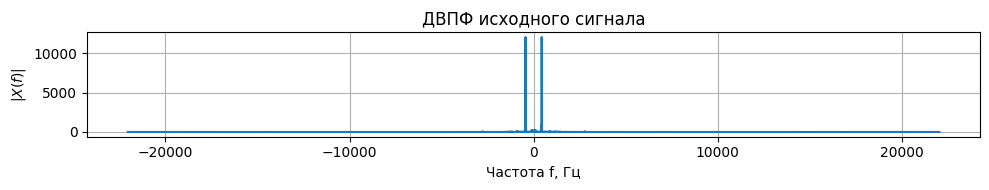

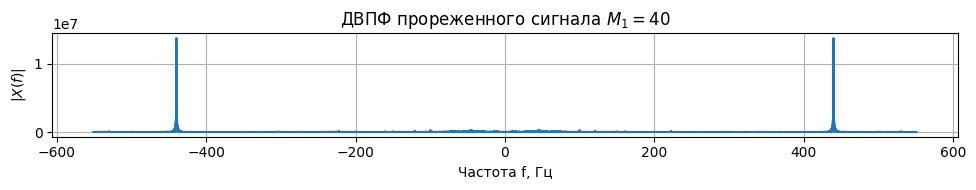

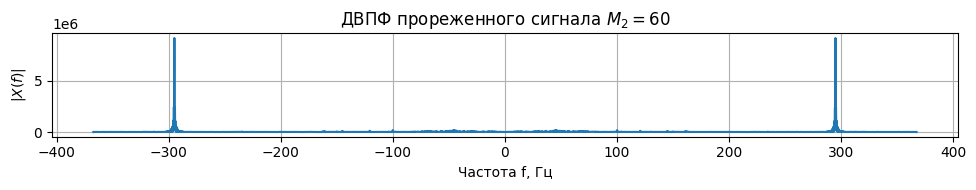

In [20]:
def DTFT_abs(xk, fs, M=2**18):
    return fs*np.arange(-0.5, 0.5, 1/M), abs(np.fft.fftshift(np.fft.fft(xk, M))) 

import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile
from scipy import signal

fs, x=scipy.io.wavfile.read('./tuning-fork.wav')
#for mono channel 
#x=x[:,1] 

plt.figure(figsize=[10, 2], dpi=100)

DFTF_plot=DTFT_abs(x/fs, fs)
plt.plot(DFTF_plot[0], DFTF_plot[1])
plt.grid()
plt.title("ДВПФ исходного сигнала")
plt.xlabel("Частота f, Гц")
plt.ylabel("$|X(f)|$")
plt.tight_layout() 

# downsampling
plt.figure(figsize=[10, 2], dpi=100)
K=40
y=np.zeros(x.size//K+1)

u=0
for xk in np.arange(0, x.size, K):
    y[u]=x[xk]
    u=u+1
# end 
DFTF_plot=DTFT_abs(y, fs/K)
plt.plot(DFTF_plot[0], DFTF_plot[1])
plt.grid()
plt.title("ДВПФ прореженного сигнала $M_1=$%i" %K)
plt.xlabel("Частота f, Гц")
plt.ylabel("$|X(f)|$")
plt.tight_layout() 

# downsampling
plt.figure(figsize=[10, 2], dpi=100)
K=60
y=np.zeros(x.size//K+1)

u=0
for xk in np.arange(0, x.size, K):
    y[u]=x[xk]
    u=u+1
# end
    
DFTF_plot=DTFT_abs(y, fs/K)
plt.plot(DFTF_plot[0], DFTF_plot[1])
plt.grid()
plt.title("ДВПФ прореженного сигнала $M_2=$%i" %K)
plt.xlabel("Частота f, Гц")
plt.ylabel("$|X(f)|$")
plt.tight_layout() 

## Система однократной децимации 

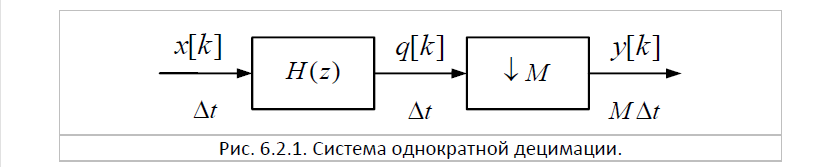

Входной сигнал $x[k]$ поступает на цифровой фильтр нижних частот с передаточной функцией с передаточной функцией $H(z)$. Его АЧХ в идеальном случае на основном периоде определяется как
	$$\left| {{H}_{\text{ид}}}(\text{ }\!\!\nu\!\!\text{ }) \right|=\left\{ \begin{matrix}
   1,\ \ \left| \nu  \right|\le \frac{1}{2M};  \\
   0,\ \text{ }\ \nu \in [-0.5,\ 0.5].  \\
\end{matrix} \right.$$                	
Здесь $\nu $— частота, нормированная на величину ${{f}_{\text{д}}}=1/\Delta t$. Цифровой фильтр позволяет ослабить (в идеальном случае — устаранить) эффект наложения высокочастотных компонент (рис. 6.1.3) при изменении частоты дискретизации. Сигнал $q[k]$ с выхода фильтра поступает на блок $\downarrow M$ (компрессор). Компрессор оставляет в сигнале $q[k]$каждый $M$-ый отсчет:
$$y[k]=\left\{ \begin{matrix}
   q[m],\ m=Mk;  \\
   0,\ m\ne Mk.  \\
\end{matrix} \right.$$
Как и в случае системы однократной интерполяции из-за невозможности физической реализации идеального фильтра нижних частот используют некоторую его каузальную аппроксимацию.


### scipy.signal.upfirdn

```scipy.signal.upfirdn(h, x, up=1, down=M, axis=- 1, mode='constant', cval=0)```

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.upfirdn.html

### scipy.signal.decimate

`scipy.signal.decimate(x, q, n=None, ftype='iir', axis=- 1, zero_phase=True)`

Downsample the signal after applying an anti-aliasing filter.

By default, an order 8 Chebyshev type I filter is used. A 30 point FIR filter with Hamming window is used if ftype is ‘fir’.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.decimate.html

* `x` — сигнал, который нужно прорядить,
* `q` — коэффицент децимации (оставляем каждый `q`-ый отсчет),
* `ftype` —  тип фильтра:
* * `ftype='iir'`  —  БИХ-фильтр Чебышева первого типа нижних частот порядка `n` (по умолчанию `n=8`),
* * `ftype='fir'`  —  КИХ-фильтр на основе окна Хэмминга порядка `n` (по умолчанию `n=20*q`),
* * `ftype=dlti` — использование собственного фильтра, опредленного в `dlti`,
* `axis=- 1` — направление в массиве данных, вдоль которыго выполняем прореживание (оставить по умолчанию для одномерных массивов).
* `zero_phase=True` — этот параметр позволяет путем использования `filtfilt` убрать фазовый сдвиг, образующийся при фильтрации.

### Пример. Прореживание сигнала flute_downsampling.wav

In [21]:
fs, x=scipy.io.wavfile.read('./flute_downsampling.wav')

C:\Users\torma\AppData\Local\Temp/ipykernel_6508/1345881150.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, x=scipy.io.wavfile.read('./flute_downsampling.wav')


In [22]:
from IPython.display import Audio
Audio('./flute_downsampling.wav')

In [23]:
x, fs

(array([0, 0, 0, ..., 0, 0, 0], dtype=int16), 44100)

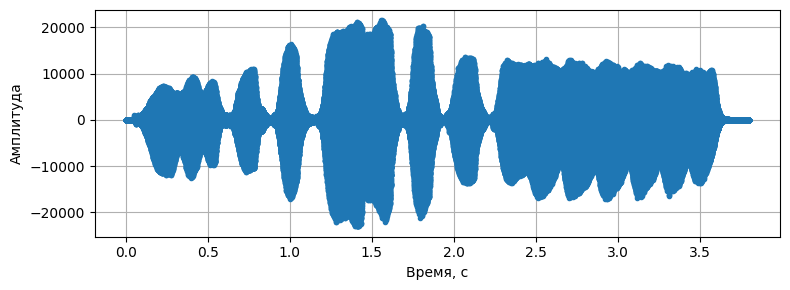

In [24]:
plt.figure(figsize=[8, 3], dpi=100)
plt.plot(np.arange(x.size)/fs, x, '.-')
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.grid()
plt.tight_layout()

### Прореживание с использованием фильтра защиты от наложения

In [25]:
x2=signal.decimate(x, q=12, ftype='iir', zero_phase=True)

In [26]:
x2=np.array(x2, dtype=np.int16)

In [27]:
scipy.io.wavfile.write('./resualt1.wav', fs//12, x2)

In [28]:
x2

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

In [29]:
from IPython.display import Audio
Audio('./resualt1.wav')

### Прореживание без использования фильтра защиты от наложения

In [30]:
x3=signal.upfirdn([1], x, down=12)
x3=np.array(x3, dtype=np.int16)

In [31]:
scipy.io.wavfile.write('./resualt2.wav', fs//12, x3)

In [32]:
from IPython.display import Audio
Audio('./resualt2.wav')

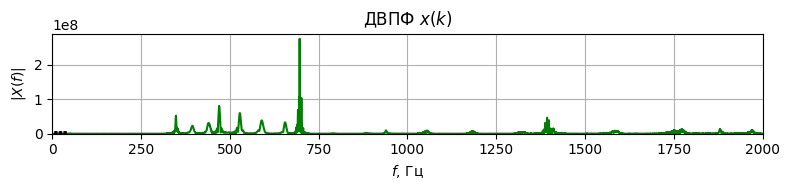

In [33]:
nu, Xn = dtft(x, M=2**18)

plt.figure(figsize=[8, 2], dpi=100)
plt.plot(fs*nu,abs(Xn),'g')
plt.axis(xmin=0, xmax=2000, ymin=0)
plt.title(u'ДВПФ $x(k)$')
plt.xlabel(u'$f$, Гц')
plt.ylabel(u'$|X(f)|$')
plt.annotate(u"$\mathbf{\dots}$", (-1.4, 5))
plt.annotate(u"$\mathbf{\dots}$", (1.35, 5))
plt.grid()
plt.tight_layout()
plt.show()

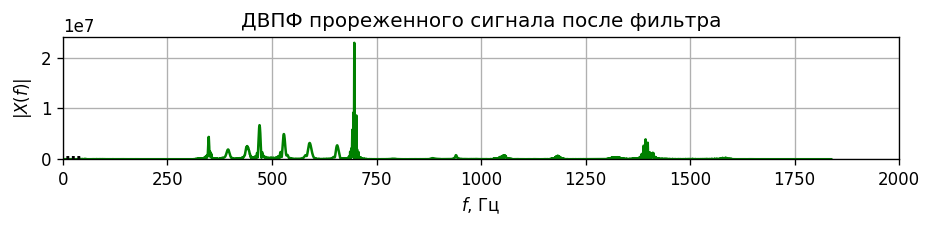

In [34]:
nu, Xn = dtft(x2, M=2**18)

plt.figure(figsize=[8, 2], dpi=120)
plt.plot(fs*nu/12,abs(Xn),'g')
plt.axis(xmin=0, xmax=2000, ymin=0)
plt.title(u'ДВПФ прореженного сигнала после фильтра')
plt.xlabel(u'$f$, Гц')
plt.ylabel(u'$|X(f)|$')
plt.annotate(u"$\mathbf{\dots}$", (-1.4, 5))
plt.annotate(u"$\mathbf{\dots}$", (1.35, 5))
plt.grid()
plt.tight_layout()
plt.show()

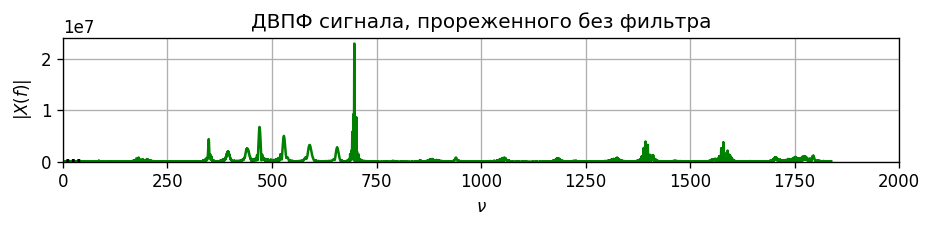

In [35]:
nu, Xn = dtft(x3, M=2**18)

plt.figure(figsize=[8, 2], dpi=120)
plt.plot(fs*nu/12,abs(Xn),'g')
plt.axis(xmin=0, xmax=2000, ymin=0)
plt.title(u'ДВПФ сигнала, прореженного без фильтра')
plt.xlabel(u'$\\nu$')
plt.ylabel(u'$|X(f)|$')
plt.annotate(u"$\mathbf{\dots}$", (-1.4, 5))
plt.annotate(u"$\mathbf{\dots}$", (1.35, 5))
plt.grid()
plt.tight_layout()
plt.show()

## Система однократной передискретизации


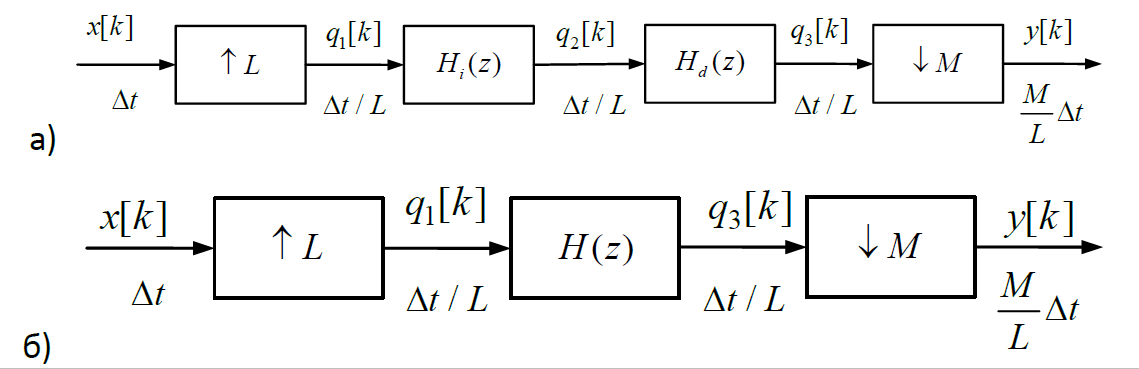

На рис. а) цифровой фильтр с передаточной функцией ${{H}_{i}}(z)$ относится к блоку однократной интерполяции. Цифровой фильтр с передаточной функцией ${{H}_{d}}(z)$ относится к блоку однократной децимации. Оба фильтра работают на одной частоте дискретизации ${{\tilde{f}}_{\text{д}}}=L/\Delta t$. Это обстоятельство позволяет объединить два фильтра в один с передаточной функцией 
$$H(z)={{H}_{i}}(z){{H}_{d}}(z).$$			
АЧХ такого фильтра в идеальном случае на основном периоде определяется как
	$$\left| {{H}_{\text{ид}}}(\widetilde{\nu}) \right|= \left\{ \begin{matrix}
   L,\ \ \left| {\tilde{\nu }} \right|\le \min \left\{ \frac{1}{2L};\frac{1}{2M} \right\};  \\
   0,\ \text{ }\ \tilde{\nu }\in [-0.5,\ 0.5].  \\
\end{matrix} \right.$$   

Здесь $\tilde{\nu }$— частота, нормированная на величину ${{\tilde{f}}_{\text{д}}}=L/\Delta t$. 
Частота дискретизации на выходе системы
	${{\bar{f}}_{\text{д}}}=\frac{L}{M\Delta t}.$ 	


```scipy.signal.upfirdn(h, x, up=L, down=M, axis=- 1, mode='constant', cval=0)```

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.upfirdn.html

In [36]:
help(scipy.signal.upfirdn)

Help on function upfirdn in module scipy.signal._upfirdn:

upfirdn(h, x, up=1, down=1, axis=-1, mode='constant', cval=0)
    Upsample, FIR filter, and downsample.
    
    Parameters
    ----------
    h : array_like
        1-D FIR (finite-impulse response) filter coefficients.
    x : array_like
        Input signal array.
    up : int, optional
        Upsampling rate. Default is 1.
    down : int, optional
        Downsampling rate. Default is 1.
    axis : int, optional
        The axis of the input data array along which to apply the
        linear filter. The filter is applied to each subarray along
        this axis. Default is -1.
    mode : str, optional
        The signal extension mode to use. The set
        ``{"constant", "symmetric", "reflect", "edge", "wrap"}`` correspond to
        modes provided by `numpy.pad`. ``"smooth"`` implements a smooth
        extension by extending based on the slope of the last 2 points at each
        end of the array. ``"antireflect"`` and

### Пример.

In [37]:
N=40
k=np.arange(N)
x=np.cos(2*np.pi*k*0.08)
L=4
M=3

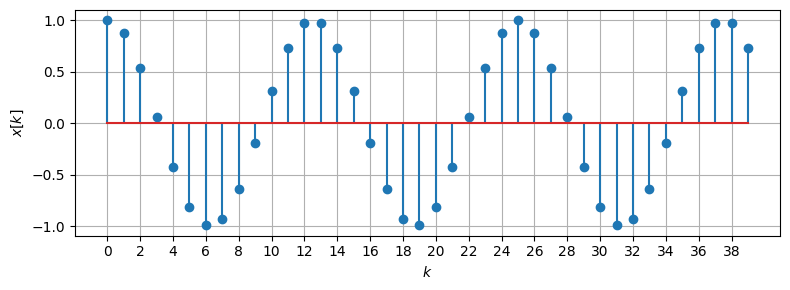

In [38]:
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(x.size), x)
plt.xlabel("$k$")
plt.ylabel('$x[k]$')
plt.xticks(np.arange(0, x.size, 2))
plt.tight_layout()
plt.grid()

<Figure size 960x600 with 0 Axes>

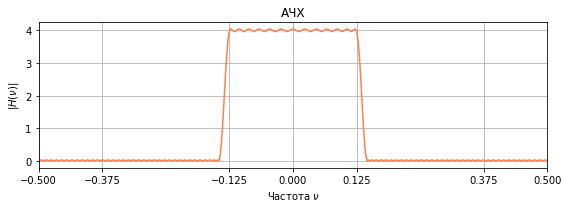

In [39]:
fs=1
f1=1/(2*L)
f2=1/(2*L)+0.02
bands = np.array([0, f1, f2, fs/2])
desired = np.array([L, 0])
weight = np.array([1, 1])
numtaps=100
h_pm = signal.remez(numtaps=numtaps, bands=bands, desired=desired, weight=weight, fs=fs)

Q=1024
plt.figure(figsize=[8, 5], dpi=120)
H1=abs(np.fft.fftshift(np.fft.fft(h_pm, Q)))
plt.figure(figsize=[8, 3])
plt.plot(np.arange(Q)/Q-0.5, H1, color='coral')
plt.grid()
plt.ylabel('$|H(\\nu)|$')
plt.xlabel('Частота $\\nu$')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.xticks([-0.5, -3/(2*L), -1/(2*L), 0, 1/(2*L), 3/(2*L), 0.5])
plt.tight_layout()

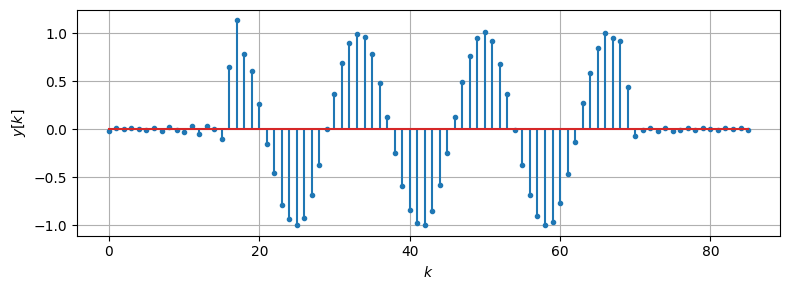

In [40]:
y=signal.upfirdn(h_pm, x, up=L, down=M)   # FIR filter
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(y.size), y, markerfmt='.')
plt.xlabel("$k$")
plt.ylabel('$y[k]$')
plt.tight_layout()
plt.grid()

## Фильтрация нулевой фазы
Как было упомянуто выше, функция `scipy.signal.decimate` при выборе `zero_phase=True` может проводить прореживание без задежки выходного сигнала, используя фильтрацию нулевой фазы.

(!) некаузальная система — может работать только с массивом в памяти, но не с системой реального времени.

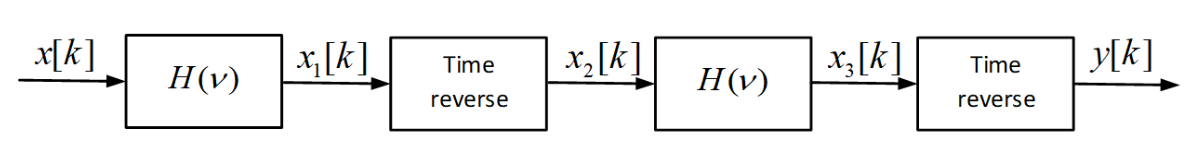

Во временной области
$${{x}_{1}}[k]=x[k]\otimes h[k]$$
$${{x}_{2}}[k]={{x}_{1}}[-k]$$
$${{x}_{3}}[k]={{x}_{2}}[k]\otimes h[k]$$
$$y[k]={{x}_{3}}[-k]$$

В частотной области
$${{X}_{1}}(\nu )=X(\nu )H(\nu )$$
$${{X}_{2}}(\nu )={{X}_{1}}^{*}(\nu )={{X}^{*}}(\nu ){{H}^{*}}(\nu )$$
$${{X}_{3}}(\nu )={{X}_{2}}(\nu )H(\nu )={{\left| H(\nu ) \right|}^{2}}{{X}^{*}}(\nu )$$
$$Y(\nu )={{\left| H(\nu ) \right|}^{2}}X(\nu )$$

Здесь использованы следующие соотношения:
$$X(\nu )=\sum\limits_{n=-\infty }^{\infty }{x}[n]{{e}^{-j2\pi \nu n}}$$
$${{X}^{*}}(\nu )=\sum\limits_{n=-\infty }^{\infty }{x}[n]{{e}^{j2\pi \nu n}}=\sum\limits_{m=-\infty }^{\infty }{x}[-m]{{e}^{-j2\pi \nu m}}$$


Схема выше эквивалентна фильтру с частотной характеристикой, сопадающей с ${{\left| H(\nu ) \right|}^{2}}$ (с нулевой ФЧХ).


### scipy.signal.filtfilt
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html

```scipy.signal.filtfilt(b, a, x, axis=-1, padtype='odd', padlen=None, method='pad', irlen=None)``` Apply a digital filter forward and backward to a signal.

**Parameters**
* ```b``` *(N,) array_like*
The numerator coefficient vector of the filter.
* ```a``` *(N,) array_like* 
The denominator coefficient vector of the filter. If  a[0] is not 1, then
both a and b are normalized by a[0].
* ```x``` *array_like*
The array of data to be filtered.

**Returns**
* ```y``` *ndarray* The filtered output with the same shape as x.

### Пример. Фильтрация сигнала с scipy.signal.filtfilt

In [41]:
M=2
Nx=64
nu0=1/10
k=np.arange(Nx)
x=np.cos(2*np.pi*nu0*k)


In [42]:
N=32
nu1=1/(2*M)-0.02 #0.05
nu2=1/(2*M)+0.02 #0.05
bands = np.array([0, nu1, nu2, 0.5])
desired = np.array([1, 0])
weight = np.array([1, 1])
h_pm = signal.remez(numtaps=N, bands=bands, desired=desired, weight=weight, fs=1)

In [43]:
y=signal.convolve(x, h_pm)

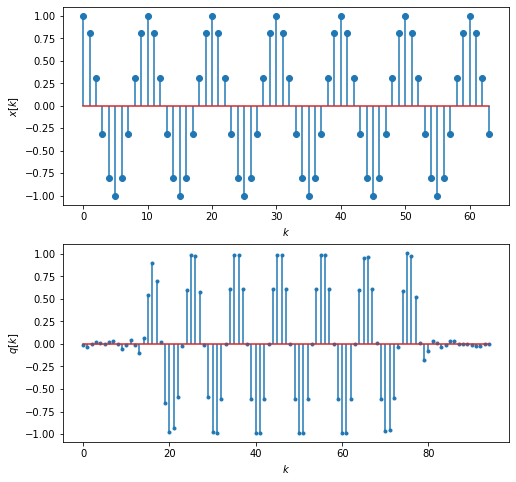

In [44]:
plt.figure(figsize=[8, 8])
plt.subplot(2, 1, 1)
plt.stem(np.arange(x.size), x)
plt.ylabel("$x[k]$")
plt.xlabel("$k$")
plt.subplot(2, 1, 2)
plt.stem(np.arange(y.size), y, 'C0', markerfmt='C0.')
plt.ylabel("$q[k]$")
plt.xlabel("$k$")
plt.show()

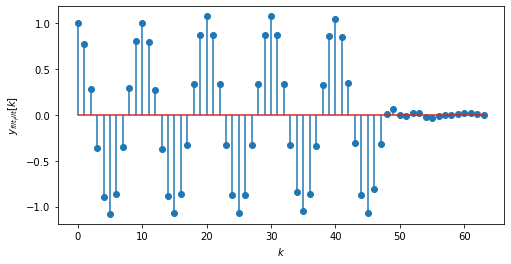

In [45]:
q2=signal.filtfilt(b=h_pm, a=[1], x=x, padlen=0, padtype=None)
plt.figure(figsize=[8, 4])
plt.stem(np.arange(q2.size), q2)
plt.ylabel("$y_{filt_filt}[k]$")
plt.xlabel("$k$")
plt.show()